In [1]:
!pip install segmentation_models_pytorch
!pip install wandb
!pip install torcheval
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

# Iniatial

In [2]:
!mkdir Dataset
!mkdir Dataset/COMOFOD

!wget -P Dataset/COMOFOD https://www.vcl.fer.hr/comofod/comofod_small.rar

--2024-05-22 10:13:24--  https://www.vcl.fer.hr/comofod/comofod_small.rar
Resolving www.vcl.fer.hr (www.vcl.fer.hr)... 161.53.16.144
Connecting to www.vcl.fer.hr (www.vcl.fer.hr)|161.53.16.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3213318957 (3.0G) [application/octet-stream]
Saving to: ‘Dataset/COMOFOD/comofod_small.rar’

comofod_small.rar   100%[===================>]   2.99G  1.80MB/s    in 27m 37s 

2024-05-22 10:41:01 (1.85 MB/s) - ‘Dataset/COMOFOD/comofod_small.rar’ saved [3213318957/3213318957]



In [3]:
!unrar x /content/Dataset/COMOFOD/comofod_small.rar /content/Dataset/COMOFOD

Streaming output truncated to the last 5000 lines.
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_JC8.jpg       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_JC9.jpg       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_NA1.png       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_NA2.png       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/104_O_NA3.png       51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_B.png           51%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_F.png           52%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_F_BC1.png       52%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_F_BC2.png       52%  OK 
Extracting  /content/Dataset/COMOFOD/CoMoFoD_small_v2/105_F_BC3.png       52%  OK 
Extracting  /content/Dataset/

In [4]:
!rm -r /content/Dataset/COMOFOD/comofod_small.rar

In [5]:
# import shutil

# shutil.rmtree('/Project/Dataset', ignore_errors=True)

# Libraries

In [1]:
# For managing COCO dataset
# from pycocotools.coco import COCO

# For creating and managing folder/ files
import glob
import os
import shutil

# For managing images
from PIL import Image
import skimage.io as io

# Basic libraries
import numpy as np
import pandas as pd
import random
import cv2

# For plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import wandb

# For importing models and working with them
## Torch
import torch
import torch.utils.data # for Dataset
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
import segmentation_models_pytorch as smp

## Torchvision
import torchvision
from torchvision.transforms import transforms

# For creating train - test splits
from sklearn.model_selection import train_test_split

import pathlib
import pylab
import requests
from io import BytesIO
from pprint import pprint
from tqdm import tqdm
import time
from imutils import paths

# Performance Metrics
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix


# Functions - to have them separated in files
import CalcMetrics as cm
import BinaryMasks as bm
import TrainModel as trModel
import ValidateModel as valModel
import TestModel as testModel
import CreateDataset_Comofod as crd
import DisplayMetrics as dm
import PlotResults as pr
import MainLoop as main
import EarlyStopping as stopping


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


# %matplotlib inline

cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda


# Data

## Data Preparation

In [2]:
dataset_path = '/content/Dataset/COMOFOD/CoMoFoD_small_v2'
original_images, altered_images, masks, coloured_masks = crd.load_dataset(dataset_path)

Starting loading dataset


In [3]:
len(original_images)

200

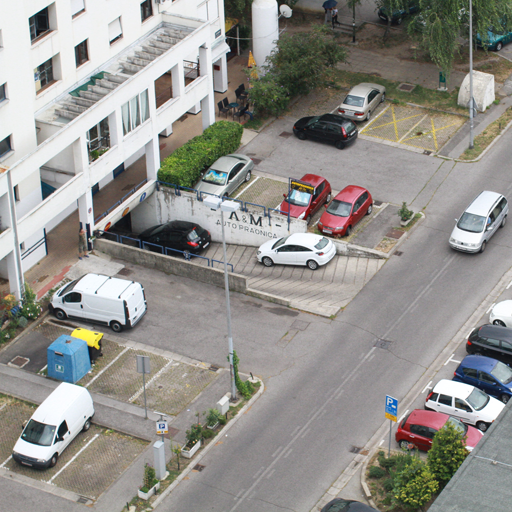

In [4]:
original_images[1]

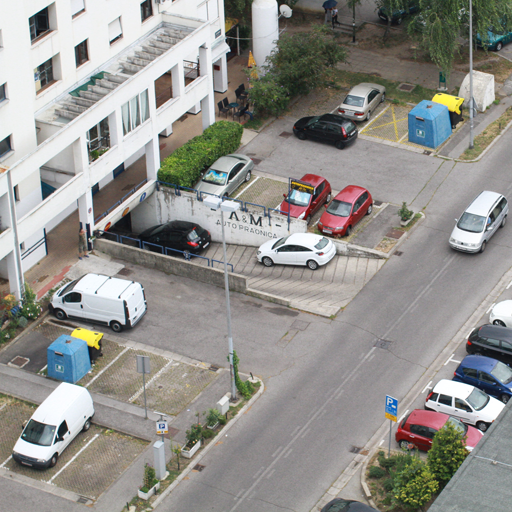

In [5]:
altered_images[1]

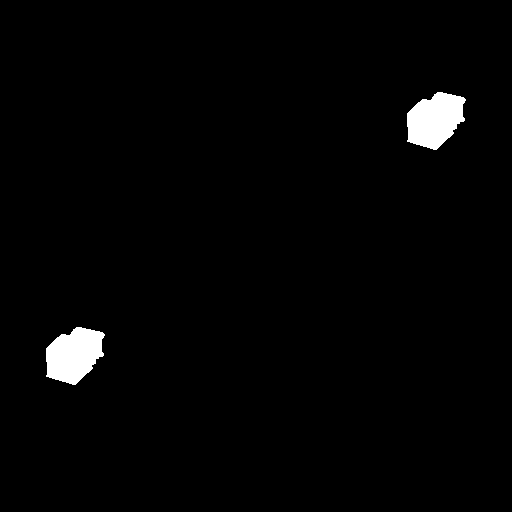

In [6]:
masks[1]

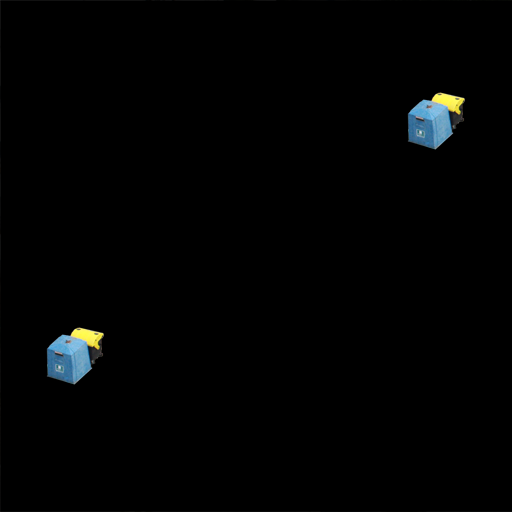

In [7]:
coloured_masks[1]

In [8]:
len(altered_images)

200

In [9]:
# 73c482950d37419655b401f882c34c719ca587af

## Main

In [10]:
RESNET_SIZE = 256
transf_size = RESNET_SIZE

# Initialize transformations - train
transforms_train = transforms.Compose([
    transforms.Resize((transf_size, transf_size)),
    transforms.ToTensor(),
])

# Initialize transformations - test (optional)
transforms_test = transforms.Compose([
    transforms.Resize((transf_size, transf_size)),
    transforms.ToTensor(),
])

# Initialize the U-Net model
# unet = smp.Unet(
#                 encoder_name = "resnet101",
#                 encoder_weights = "imagenet",
#                 in_channels = 3,  # 3 channels for the image
#                 classes = 1,  # 1 class => binary mask
#                 activation = 'sigmoid'
#                ).to(device)


# Define hyperparameters
INIT_LR = 0.0001
BATCH_SIZE = 8
NUM_EPOCHS = [10, 20, 50, 100, 150]
TEST_SPLIT = [0.1, 0.2] # 0.3
VALID_SPLIT = 0.2 # 0.1

wb_name = "Resnet_Unet_COMOFOD_altered_imgs"

main.main_loop(original_images, altered_images, masks, transforms_train, transforms_test, wb_name, INIT_LR, BATCH_SIZE, NUM_EPOCHS, TEST_SPLIT, VALID_SPLIT)





wandb: Currently logged in as: bianca-apostolescu (bianca-team). Use `wandb login --relogin` to force relogin


[INFO] TEST_SPLIT = 0.1 ...
Splits, Datasets, and Dataloaders
[INFO] Total time taken to create the dataset and dataloader: 0.00s
trainSteps = 18, testSteps = 2, valSteps = 4


[INFO] Training the network for 10 epochs...


  0%|          | 0/10 [00:00<?, ?it/s]

Training...
Validating...


 10%|█         | 1/10 [00:08<01:16,  8.54s/it]

Training...
Validating...


 20%|██        | 2/10 [00:14<00:57,  7.16s/it]

Training...
Validating...


 30%|███       | 3/10 [00:20<00:47,  6.75s/it]

Training...
Validating...


 40%|████      | 4/10 [00:27<00:39,  6.61s/it]

Training...
Validating...


 50%|█████     | 5/10 [00:33<00:32,  6.41s/it]

Training...
Validating...


 60%|██████    | 6/10 [00:39<00:25,  6.46s/it]

Training...
Validating...


 70%|███████   | 7/10 [00:46<00:19,  6.34s/it]

Training...
Validating...


 80%|████████  | 8/10 [00:53<00:13,  6.65s/it]

Training...
Validating...


 90%|█████████ | 9/10 [00:59<00:06,  6.50s/it]

Training...
Validating...


100%|██████████| 10/10 [01:06<00:00,  6.62s/it]


[INFO] Total time taken to train and validate the model: 66.21s
Testing...


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[8, 6, 256, 256] to have 3 channels, but got 6 channels instead

TypeError: plot_results() takes 1 positional argument but 5 were given